In [3]:
import os
import numpy as np
from matplotlib import pyplot as plt
import pytraj as pt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)


In [4]:
corr_dir='//Users/mingyu/analysis/Residue_corr/empty_cox-2//'
corr =np.loadtxt('correl_3.out')
cont=np.loadtxt('native.dist_all_3.out')  #get the native contact
cont=cont[:,1:]
cont2=np.loadtxt('nonnative.dist_all_3.out') #get the nonnative contact  
cont2=cont2[:,1:]
cont=cont+cont2
cont[np.abs(cont) < 2] = 0               # ignore the week interaction, normalization
norn_cont=np.tanh(cont/8)                # use sigmoid to normalize the contact, to reduce the effect of contact in the final matrix
# one can check the distribution of correlation value [-1,1], and the contact value [0,1?0)
#So in my opinion, binarize the contact will give better results.

weight_all=norn_cont*corr     #element-wise product of the two matrix.
weight_all=abs(weight_all) 
print(weight_all.max(),weight_all.min(),weight_all.shape)

0.8909634666191871 0.0 (1108, 1108)


In [5]:
important_res=np.array
for r1 in range(1,554):
    for r2 in range(554,1108):
        if weight_all[r1][r2]>0.4:
            print(f'residue {r1+1} and residue {r2+1} interaction is important,weight value {weight_all[r1][r2]}')

residue 13 and residue 1070 interaction is important,weight value 0.5030269719056101
residue 25 and residue 1069 interaction is important,weight value 0.5058045761081615
residue 25 and residue 1070 interaction is important,weight value 0.6408549405353839
residue 27 and residue 1068 interaction is important,weight value 0.4329984278197157
residue 27 and residue 1069 interaction is important,weight value 0.4492397693282369
residue 95 and residue 1060 interaction is important,weight value 0.4228824474252843
residue 95 and residue 1063 interaction is important,weight value 0.4385753458246682
residue 95 and residue 1066 interaction is important,weight value 0.49573412259242655
residue 96 and residue 1066 interaction is important,weight value 0.5144076669186243
residue 97 and residue 1065 interaction is important,weight value 0.415198697564816
residue 97 and residue 1066 interaction is important,weight value 0.5509934999727429
residue 104 and residue 848 interaction is important,weight value

<AxesSubplot:>

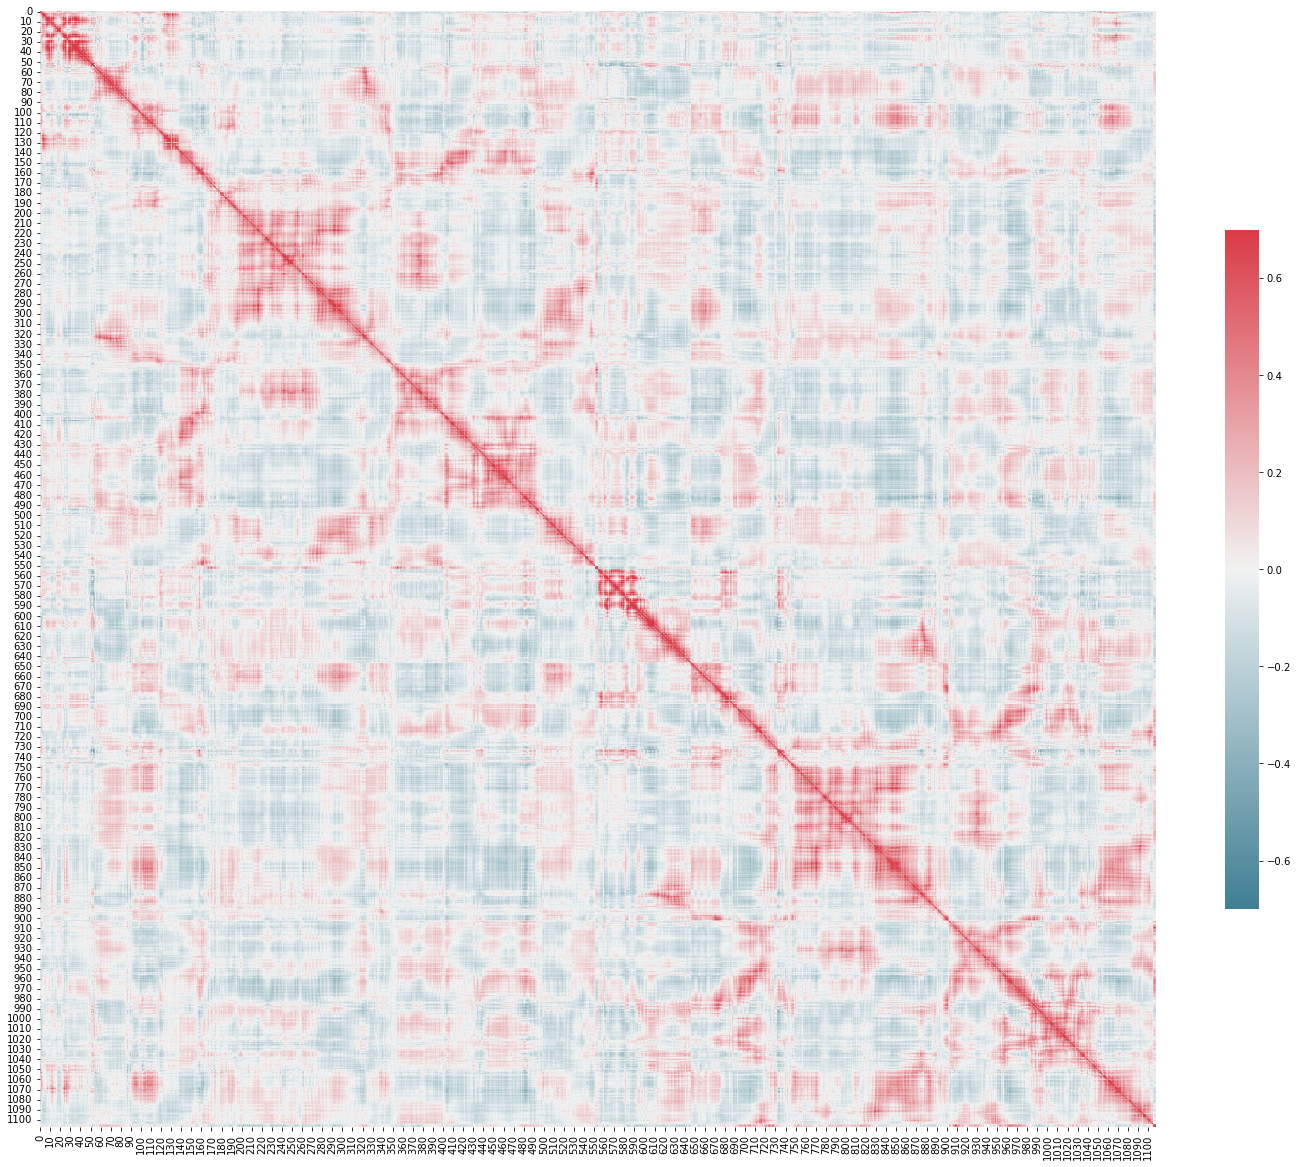

In [15]:
f, ax = plt.subplots(figsize=(25, 25))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

#Draw the heatmap with correct aspect ratio
sns.heatmap(corr, cmap=cmap, vmax=.7,vmin=-0.7,
            square=True, xticklabels=10, yticklabels=10,
            cbar_kws={"shrink": .5}, ax=ax)